>  # **Feature Information**:

>1. **employee_id**:  Unique ID for employee
>2. **department**:  Department of employee
>3.  **region**:  Region of employment (unordered)
>4. **education**:  Education Level
>5. **gender**:  Gender of Employee
>6. **recruitment_channel**:  Channel of recruitment for employee
>7. **no_ of_ trainings**:  no of other trainings completed in previous year on soft skills, technical skills etc.
>8. **age**: Age of Employee
>9. **previous_ year_ rating**:  Employee Rating for the previous year
>10. **length_ of_ service**:  Length of service in years
>11. **awards_ won?**:  if awards won during previous year then 1 else 0
>11. **avg_ training_ score**:  Average score in current training evaluations
>12. **is_promoted**:  (Target)  Recommended for promotion



># **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import missingno as mn

from scipy import stats
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
sns.set_style('whitegrid')
# sns.color_palette("flare")
sns.set_palette(sns.color_palette('hls'))
pd.set_option('display.max_columns', None)
!pip install dython 2>/dev/null 1>&2
from dython.nominal import associations





># **Loading Data**

In [2]:
train = pd.read_csv("/kaggle/input/hr-ana/train.csv")
test = pd.read_csv("/kaggle/input/hr-ana/test.csv")

#making a copy of training data
train_c = train.copy()
test_c = test.copy()

In [3]:
#genral view of dataset
print('\n','Train Data:','\n')
print(f'Shape of Train Data: {train_c.shape}\n')
display(train_c.head())
print('\n')
print('\n','Test Data:','\n')
print(f'Shape of Test Data: {test_c.shape}\n')
display(test.head())



 Train Data: 

Shape of Train Data: (54808, 13)



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0





 Test Data: 

Shape of Test Data: (23490, 12)



,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [4]:
#general information of the columns in taining and test set
print('\n','Train Data:','\n')
display(train_c.info())
print('='* 100)
print('\n','Test Data:','\n')
display(test_c.info())



 Train Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


None


 Test Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


None

In [5]:
#categorical and numerical features


cat_col = [a for a in train_c.columns if train_c[a].dtype in ['object']]
print(f'\nNumber of Categorical features: {len(cat_col)}')
print('\nCategorical_features',cat_col)

num_col = [a for a in train_c.columns if train_c[a].dtype in ['float64','int64']]
print(f'\nNumber of Numerical features: {len(num_col)}')
print('\nNumerical_features:',num_col)

target= num_col.pop()
print(f'\nTarget: {target}')




Number of Categorical features: 5

Categorical_features ['department', 'region', 'education', 'gender', 'recruitment_channel']

Number of Numerical features: 8

Numerical_features: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']

Target: is_promoted


there are 5 object datatype columns so they contain string values, it could be alpanumeric type in some cases.
Well, 'previous_year_rating' feature is an interesting. It is an opinion variable and categorized as ordinal categorical feature. [Here](https://stats.stackexchange.com/questions/430636/is-a-rating-in-a-set-range-a-categorical-or-numerical-variable?newreg=702a3981ab5c4215b29266d83ae9b2b6) is an interesting discussion about it. We will consider "previous_year_rating' as categorical feature.
So now we have 6 categorical features and 6 numerical features. 

# **Null values**

In [6]:
#percentage of missing values per column
print(round(train_c.isnull().sum()/ train_c.shape[0], 2),'\n')

print("total percentage of missing values:",round(train_c.isnull().sum().sum()/
                                                  train_c.shape[0]),3) 

print(round(test_c.isnull().sum()/ train_c.shape[0], 2),'\n')

print("total percentage of missing values:",round(test_c.isnull().sum().sum()/
                                                  test_c.shape[0]),3) 

employee_id             0.00
department              0.00
region                  0.00
education               0.04
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    0.08
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64 

total percentage of missing values: 0 3
employee_id             0.00
department              0.00
region                  0.00
education               0.02
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    0.03
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64 

total percentage of missing values: 0 3


Hmm, only two feature('employee','previous_year_rating') got missing values and they both are categorical features.But one have almost 
double the amount of NaNs than ohter. We can not simply drop the rows with Nan values as it contains 
useful information.We have to find a way to make to fill them:)


In [7]:
#unique values columnwise
train_c.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [8]:
#summary statistics

print(f'summary statistics of Train Data:\n')
display(train_c.describe())
print('\n')

print(f'summary statistics Test Data: \n')
display(test_c.describe())

summary statistics of Train Data:



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000




summary statistics Test Data: 



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [9]:
train_c['origin'] = 'train'
test_c['origin'] = 'test'
#joining the train and test set to visualize and compare

df = pd.concat([train_c,test_c]).reset_index(drop=True)
features = num_col + cat_col

<AxesSubplot:title={'center':'Test Uniques'}>

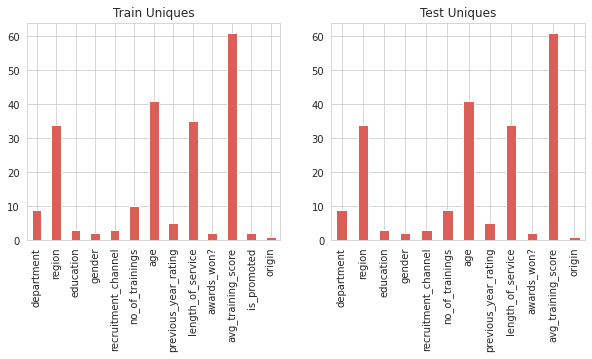

In [10]:
#unique values in dataset
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax=ax.flatten()

train_c.iloc[:,1:].nunique().plot.bar(ax=ax[0],title='Train Uniques')
test_c.iloc[:,1:].nunique().plot.bar(ax=ax[1],title='Test Uniques')



# Exploratory Data Analysis

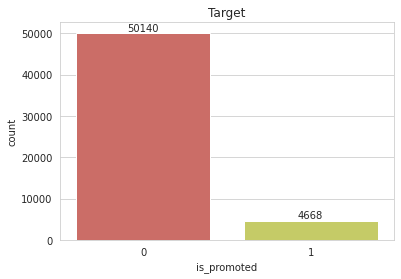

In [11]:
#Target 
ax = sns.countplot(data = train_c,x='is_promoted')
plt.title('Target')
x = ax.bar_label(ax.containers[0])

From there are less positive case so this is an Imbalanced Class problem. 

In [12]:
train_c['origin'] = 'train'
test_c['origin'] = 'test'
#joining the train and test set to visualize and compare

df = pd.concat([train_c,test_c]).reset_index(drop=True)
features = num_col + cat_col



<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

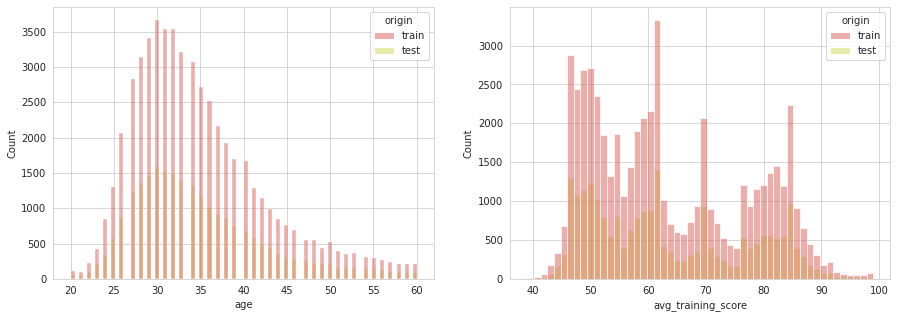

In [13]:
num_co= ['age','avg_training_score']

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax= ax.flatten()
sns.histplot(df,x='age',hue='origin',ax=ax[0])
sns.histplot(df,x='avg_training_score',hue='origin',ax=ax[1])


Observation:
* Train and Test data have same distribution for age and avg_training_score
* Employees  are mostly age between 25-40.
* avg training score have values in all range of rating but score between 46-60 are the highest means medium training score is high.

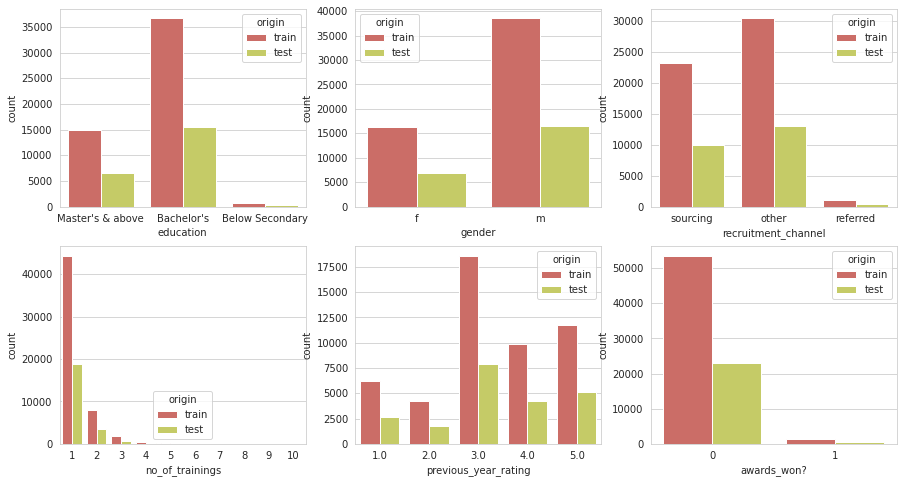

In [14]:
cat_co = ['education','gender','recruitment_channel','no_of_trainings', 
          'previous_year_rating', 'awards_won?']
fig,ax= plt.subplots(2,3,figsize=(15,8))
col = []

ax=ax.flatten()

for i,feature in enumerate(cat_co):  
    sns.countplot(data=df,x=feature,hue='origin',ax=ax[i])


>Obervations:
* Mostly graduate employees in the organization.
* Females are half in numbers than male employees.



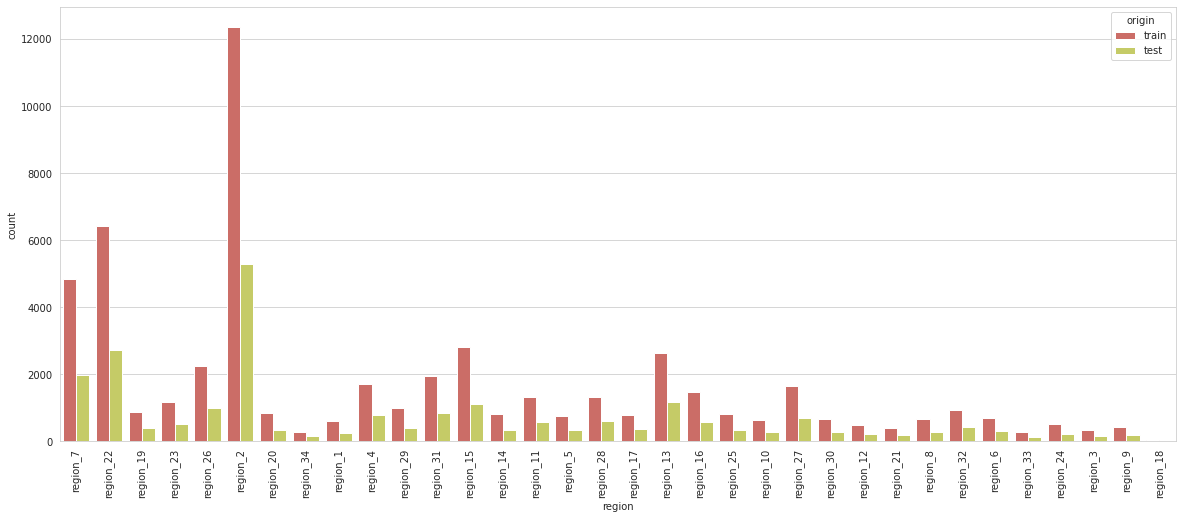

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='region',hue='origin')
ax= plt.xticks(rotation=90)

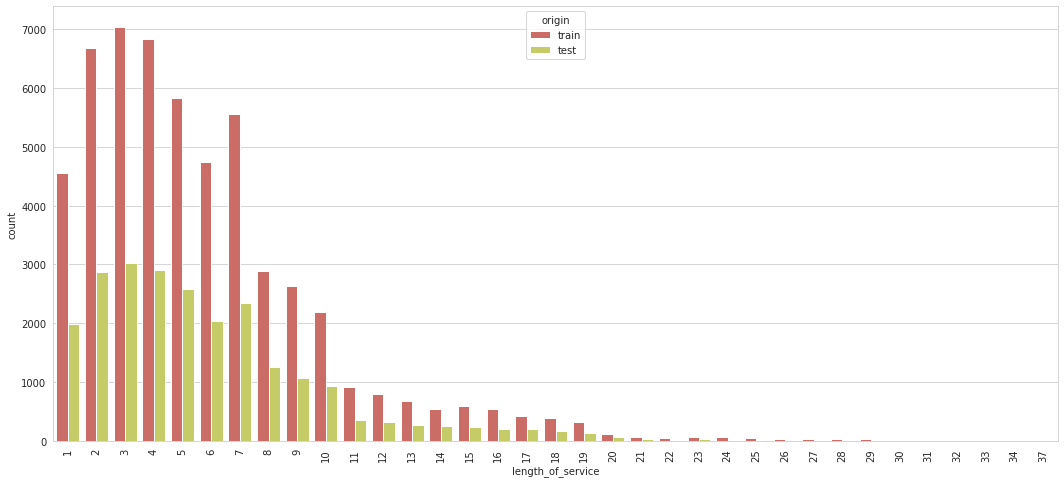

In [16]:
plt.figure(figsize=(18,8))
ax = sns.countplot(data=df,x='length_of_service',hue='origin')
ax= plt.xticks(rotation=90)


>Observations:
* Ratio in train and test for the length of service value in year in almost same.
* People with 2-5 year service to the company are maximum.
* Mostly Employees less than 10 years of length of service.
* Employees with 20+ experience in the same company is very less. 


# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix of Test')

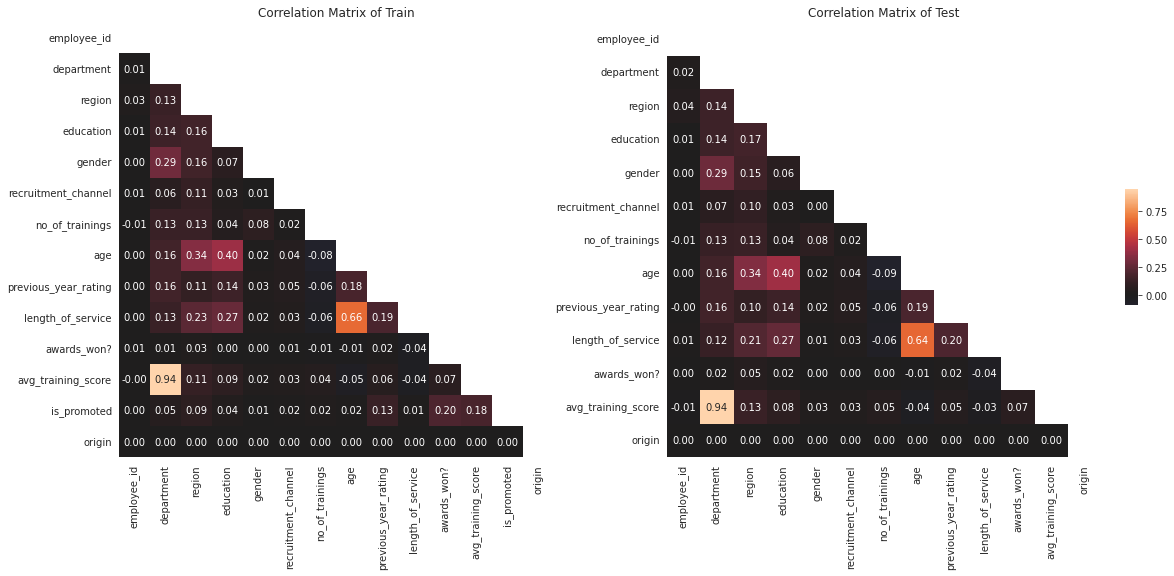

In [17]:
# Calculate pairwise-correlation
fig, ax = plt.subplots(1,2,figsize=(18,8))
cbar_ax = fig.add_axes([.91, .39, .01, .2])

matrix_1 = associations(train_c,numerical_columns=num_col,nominal_columns=num_col,
                        compute_only=True,plot=False)['corr']
matrix_2 = associations(test_c,numerical_columns=num_col,nominal_columns=num_col,
                        compute_only=True,plot=False)['corr']
# Create a mask
mask_1 = np.triu(np.ones_like(matrix_1, dtype=bool))
mask_2 = np.triu(np.ones_like(matrix_2,dtype=bool))
# Create a custom divergin palette
sns.heatmap(matrix_1, mask=mask_1, center=0, annot=True,
            fmt='.2f', square=True,ax=ax[0],cbar_ax=cbar_ax)
sns.heatmap(matrix_2, mask=mask_2, center=0, annot=True,
            fmt='.2f', square=True,ax=ax[1],cbar_ax=cbar_ax)

ax[0].set_title('Correlation Matrix of Train')
ax[1].set_title('Correlation Matrix of Test')

Observations:
* Correlation matrix or train and test set is almost similar.
* Target Variable('is_promoted') have good 'positive' correlation with 'previous_year_rating','awards_won?' and 'avg_training_score'.
* avg_training_score and deparment have strong positive corraltion as well as between 'length_of_service' and 'age'.
* 'age' and length have good positive correlation with 'region' and 'education'.
* 'gender and deparment have good positive correaltion.

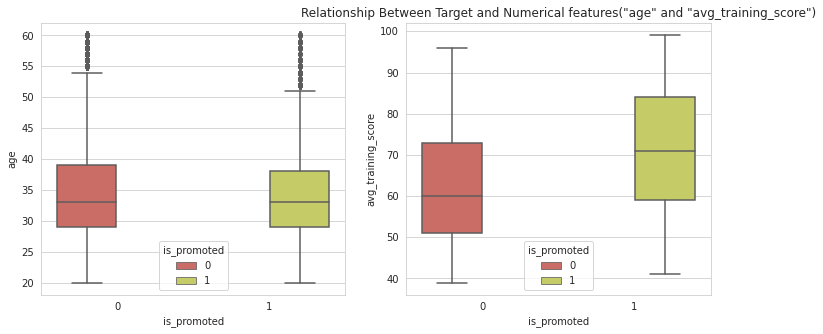

In [18]:

num_co= ['age','avg_training_score']
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(data=train_c,x='is_promoted',y='age',ax=ax[0],hue='is_promoted')
sns.boxplot(data=train_c,x='is_promoted',y='avg_training_score',ax=ax[1],hue='is_promoted')
plt.title('Relationship Between Target and Numerical features("age" and "avg_training_score")',)
plt.show()

Observations:
* 25% of emplyees promoted are less than 28 years and around same for not being promoted but boxes are not of same length(the longer the box plot,data will be more dispersed),box is longer for not promoted coloumn,it means Employees who are promoted and their age is less dispersed than not promoted,and higher age employee have less chance of promotion.
* Higher the number of training,higher the chance of getting promoted.


<AxesSubplot:xlabel='is_promoted', ylabel='Count'>

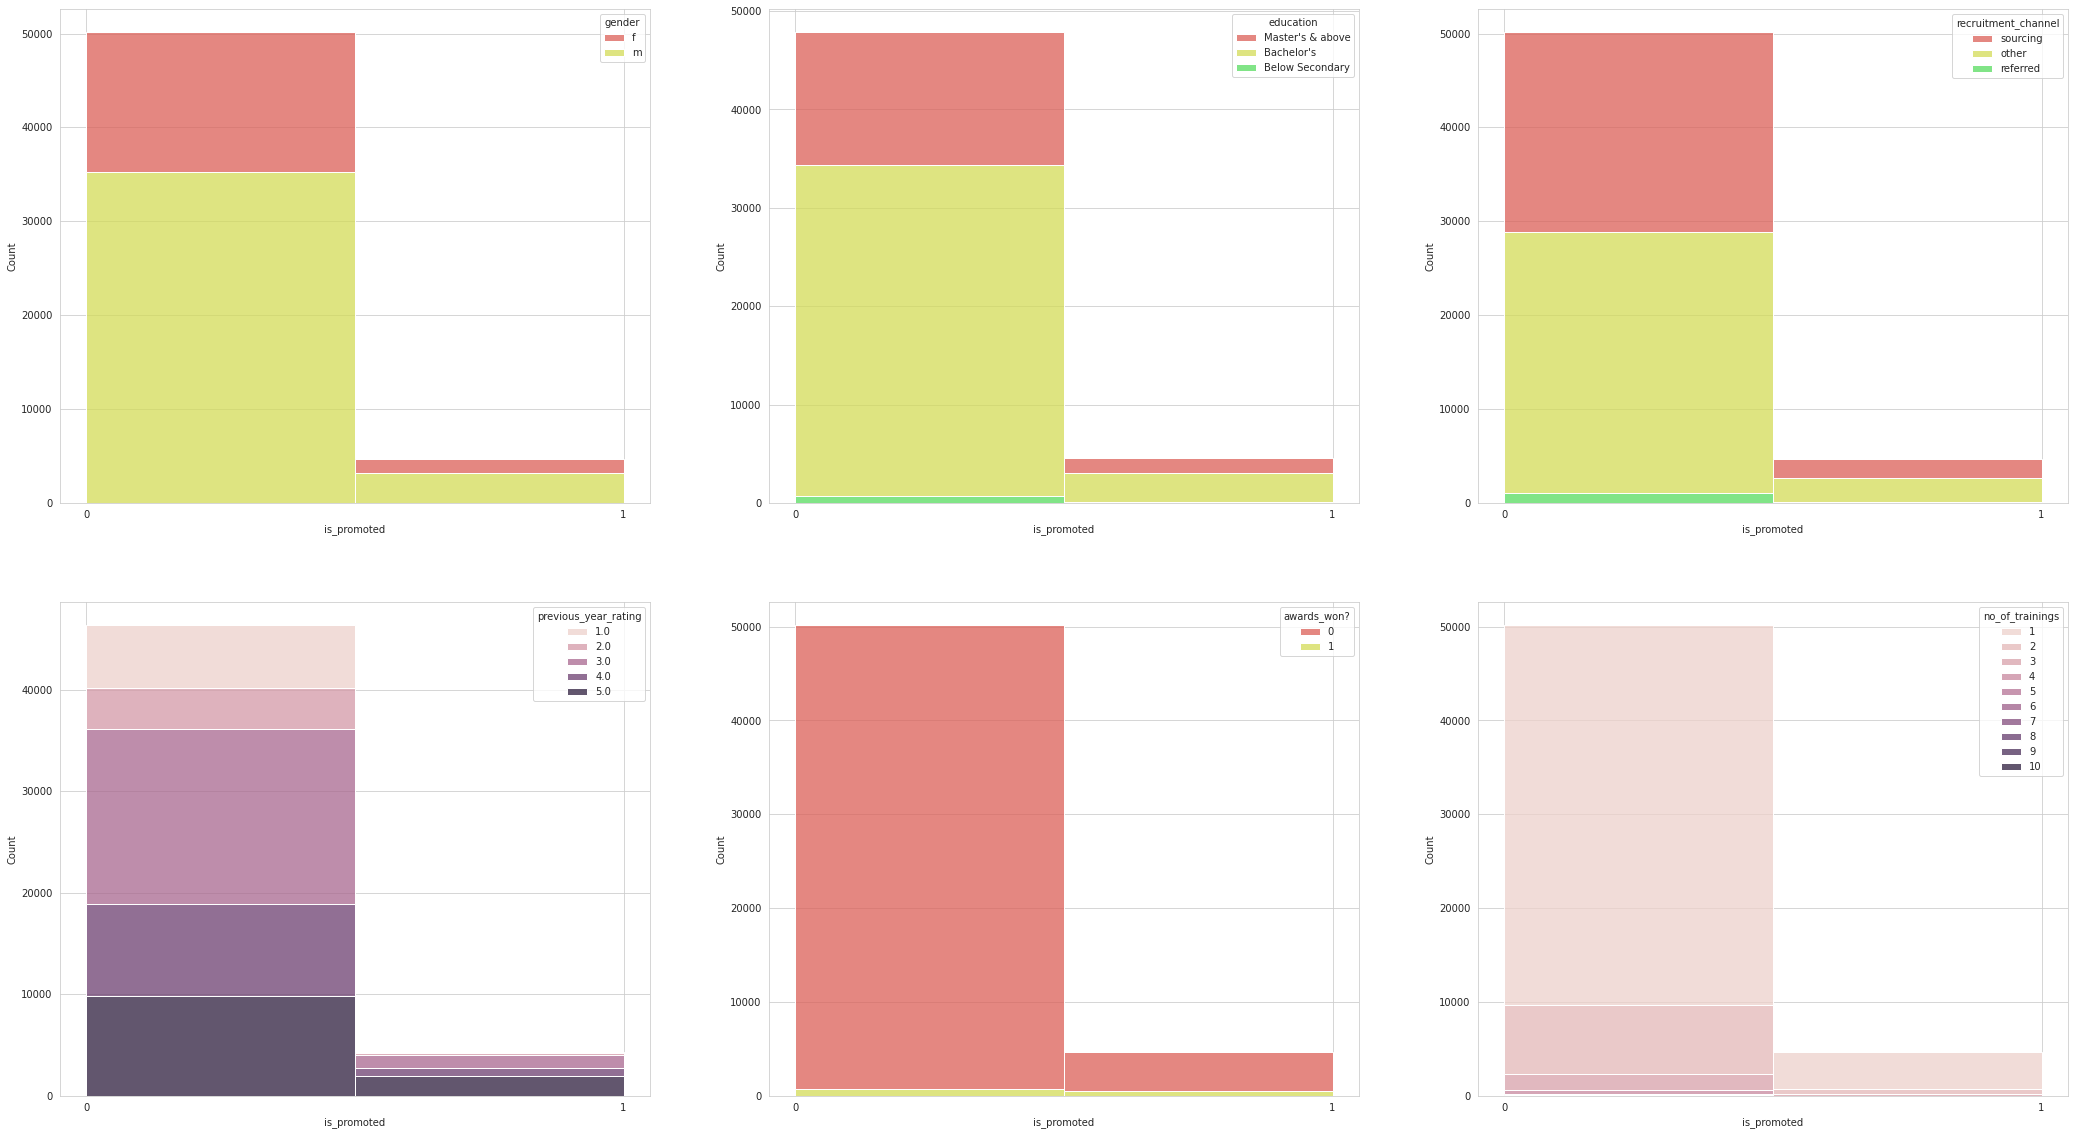

In [19]:
cat_co = ['education','gender','recruitment_channel','no_of_trainings', 
          'previous_year_rating', 'awards_won?']
fig, ax = plt.subplots(2,3,figsize=(36,20))
plt.setp(ax,xticks=[0,1])
ax=ax.flatten()

sns.histplot(binwidth=0.5,x="is_promoted", hue="gender", data=train_c, stat="count", multiple="stack",ax=ax[0])
sns.histplot(binwidth=0.5,x="is_promoted", hue="education", data=train_c, stat="count", multiple="stack",ax=ax[1])
sns.histplot(binwidth=0.5,x="is_promoted", hue="recruitment_channel", data=train_c, stat="count", multiple="stack",ax=ax[2])
sns.histplot(binwidth=0.5,x="is_promoted", hue="previous_year_rating", data=train_c, stat="count", multiple="stack",ax=ax[3])
sns.histplot(binwidth=0.5,x="is_promoted", hue="awards_won?", data=train_c, stat="count", multiple="stack",ax=ax[4])
sns.histplot(binwidth=0.5,x="is_promoted", hue="no_of_trainings", data=train_c, stat="count", multiple="stack",ax=ax[5])

Observations:
* Feamles are little less than 1/2 of total employees, but when it comes to promotion,they are around 1/3 of the total promoted employees,it means female employees have less chance of promotion than male.
* as from the correaltion metric,we saw that target and previous_year_rating having positive corraltion(0.13),higher the rating,more chance of promotion.


In [20]:
train_c.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,origin
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,train
